In [1]:
# importing the libraries required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#storing the data in the dataframe

df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Getting to know my data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [4]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
df.shape

(30, 2)

# Linear Regression using Gardient descent concept.

**Steps for Gradient Descent**

**1.First initialization of m and b value. (By assuming, with m=1 and b=0 for the very first time)**

**2.Assuming a Learning rate and then calculating the step-size for calculating the next m and b value.**

**3.Calculating the next value with m and b.**

**4.Repeating the entire steps for all the new values of m and b unill step size <= 0.001, i.e more or less 1000 times**

*Formulae to be used :*

**Equation of a straight line : y=mx + b** ; here m = slope of the line and b is the intercept of the line

**Equation of the SS of a particular line : Σ(pyi-ayi)^2** ; i ranges from 1 to n where n is the total no of y points.

yi = the y value for the ith point.

pyi = predicted yi value of the best fit line.

ayi = actual yi value.

SS = Sum of the squared distance

**from the equation of the SS line we will see that SS = f(m,b)** i.e. SS is a function of m and b

**Calculation of b:**

differentiate f(m,b) with respect to b.

Then follow the 4 steps of Gradient descent as mentioned above for just b value.

**Calculation of m:**

differentiate f(m,b) with respect to m.

Then follow the 4 steps of Gradient descent as mentioned above for just m value.

# Linear Regression algorithm

In [6]:
class LinearRegressionGD:
    
    def __init__(self): #constructor for my class which will help me in initializing my variable
        self.m=0
        self.b=0
        
    def ss_deriv(self,data_x,data_y): # function to carry out the derivative of my SS line 
        ypi=self.m*data_x+self.b  #predicted y value
        step_m=(2) * sum(data_x *(ypi-data_y)) #derivative of the SS line w.r.t m(slope)
        step_b=(2) * sum(ypi-data_y) #derivative of my SS line w.r.t to b(intercept)
        return step_m,step_b #returning my derivatives
    
    def fit(self,data_x,data_y,lr=0.001): #my fit function for fitting my model with the data
        for _ in range(1000): #carrying out the process 1000 times to get the minima of my SS line
            s_m,s_b = self.ss_deriv(data_x,data_y) #storing the 2 derivatives of my SS line from ss_deriv function
            if (s_m == 'Nan' or s_b == 'Nan'):#sometimes it had been seen, that w.r.t to learning rate(lr) the 2 values of my SS derivated line is so large that it returns Nan value
                return self #whenever I'll see that my ss_deriv function is giving Nan value I'll stop my loop there and return whatever value we have got.
            else:
                self.m= self.m - (s_m*lr) #calculating my slope according to the formula
                self.b= self.b - (s_b*lr) #calculating my intercept according to the formula
        return self #returning my slope nad intercept value
            
    def predict(self,test_x): #function to predict answers according to the input data
        y = self.m*test_x + self.b #calculating my y value with the help of my straight line equation: y = mx + b
        
        return y #returning my y value

In [7]:
#since my fit and predict function takes in arrays or list, so we need to keep that in mind and define the x and y variable
x = np.array(df.iloc[:,0].values)
y = np.array(df.iloc[:,1].values)

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0) #splitting my data into two parts for training and testing
#setting my random state to 0, so a randomly-initialized RandomState object is returned.

In [9]:
regressor = LinearRegressionGD() # making the object of my class 

In [10]:
regressor.fit(train_x,train_y) #fitting my training data

In [11]:
#using the predict function for predicting
y_pred = regressor.predict(test_x)
y_pred

array([ 40747.84610873, 122700.53693219,  64961.14112476,  63098.57996968,
       115250.29231188, 107800.04769156])

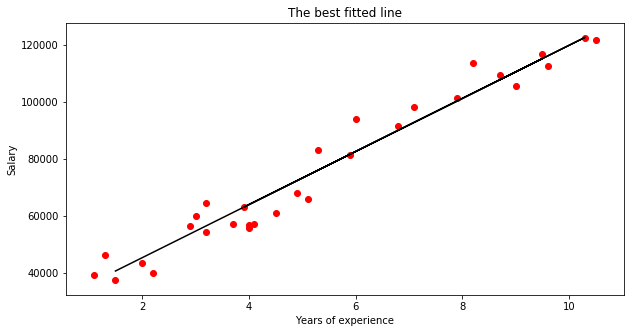

In [12]:
#plotting the best fit line
plt.figure(figsize=(10,5))
plt.plot(test_x,y_pred,color='black')
plt.scatter(x,y,color='red')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("The best fitted line")
plt.show()

In [13]:
#finding the accuracy of the model
from sklearn.metrics import r2_score
print("The accuracy of my model is",r2_score(test_y,y_pred)*100,"%")

The accuracy of my model is 98.81723531509394 %


In [14]:
print("A person with 20 years of work experience is expected to have a salary of Rs.",regressor.predict(20))

A person with 20 years of work experience is expected to have a salary of Rs. 213034.75295350206


**My algorithm is thus working fine with an accuracy of 98.82% with the given salary vs experience dataset**